<a href="https://colab.research.google.com/github/TamTran72111/learn-ml-dl/blob/master/Augelien_Geron_book/12_Custom_Models_and_Training_with_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color='red'><b><h3>Using TensorFlow like Numpy</h3></b></font>

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
tf.constant([[1., 2., 3.], [4., 5., 6.]])     # matrix

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [3]:
tf.constant(42) # scalar

<tf.Tensor: shape=(), dtype=int32, numpy=42>

In [4]:
t = tf.constant([[1., 2., 3.], [4., 5., 6.]])

In [5]:
t.shape

TensorShape([2, 3])

In [6]:
t.dtype

tf.float32

In [7]:
t[:, 1:]

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 3.],
       [5., 6.]], dtype=float32)>

In [8]:
t[..., 1, tf.newaxis]

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[2.],
       [5.]], dtype=float32)>

In [9]:
t + 10

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[11., 12., 13.],
       [14., 15., 16.]], dtype=float32)>

In [10]:
tf.square(t)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)>

In [11]:
# @ means matrix multiplication, and is equivalent to tf.matmul()
t @ tf.transpose(t)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

In [12]:
a = np.array([2., 4., 5.])
tf.constant(a)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([2., 4., 5.])>

In [13]:
t.numpy() # same as np.array(t)

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

In [14]:
tf.square(a)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([ 4., 16., 25.])>

In [15]:
np.square(t)

array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)

In [16]:
tf.constant(2.) + tf.constant(40)

InvalidArgumentError: ignored

In [17]:
tf.constant(2.) + tf.constant(40, dtype=tf.float64)

InvalidArgumentError: ignored

In [18]:
tf.constant(2.0) + np.array([42], dtype=np.float64)

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([44.], dtype=float32)>

In [19]:
t2 = tf.constant(40.0, dtype=tf.float64)
tf.constant(2.0) + tf.cast(t2, tf.float32)

<tf.Tensor: shape=(), dtype=float32, numpy=42.0>

In [20]:
v = tf.Variable([[1., 2., 3.], [4., 5., 6.]])
v

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [21]:
v.assign(2 * v)
v

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [22]:
v[0, 1].assign(42)
v

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [23]:
v[:, 2].assign([0., 1.])
v

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  0.],
       [ 8., 10.,  1.]], dtype=float32)>

In [24]:
v.scatter_nd_update(indices=[[0, 0], [1,2]], updates=[100., 200.])
v

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[100.,  42.,   0.],
       [  8.,  10., 200.]], dtype=float32)>

<font color='red'><b><h3>Customizing Models and Training Algorithms</h3></b></font>

**Huber Loss**

In [25]:
def huber_fn(y_true, y_pred):
  error = y_true - y_pred
  is_small_error = tf.abs(error) < 1
  squared_loss = tf.square(error) / 2
  linear_loss = tf.abs(error) - 0.5
  return tf.where(is_small_error, squared_loss, linear_loss)

In [26]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target.reshape(-1, 1), random_state=42
)

X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42
)

In [27]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

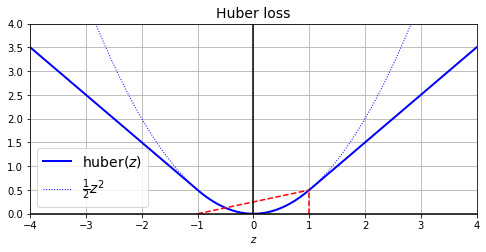

In [28]:
plt.figure(figsize=(8, 3.5))
z = np.linspace(-4, 4, 200)
plt.plot(z, huber_fn(0, z), 'b-', linewidth=2, label='huber($z$)')
plt.plot(z, z**2 / 2, 'b:', linewidth=1, label=r'$\frac{1}{2}z^2$')
plt.plot([-1, 1], [0, huber_fn(0., -1.)], 'r--')
plt.plot([1, 1], [0, huber_fn(0., 1.)], 'r--')
plt.gca().axhline(y=0, color='k')
plt.gca().axvline(x=0, color='k')
plt.axis([-4, 4, 0, 4])
plt.grid(True)
plt.xlabel('$z$')
plt.legend(fontsize=14)
plt.title('Huber loss', fontsize=14)
plt.show()

In [29]:
input_shape = X_train.shape[1:]

In [30]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='selu', kernel_initializer='lecun_normal',
                       input_shape=input_shape),
    keras.layers.Dense(1),
])

In [31]:
model.compile(loss=huber_fn, optimizer='nadam', metrics=['mae'])

In [32]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 1s 2ms/step - loss: 0.5606 - mae: 0.9234 - val_loss: 0.2275 - val_mae: 0.5248
Epoch 2/2
363/363 [==============================] - 1s 2ms/step - loss: 0.2165 - mae: 0.5121 - val_loss: 0.2049 - val_mae: 0.4900


**Saving and Loading models with custom objects**

In [33]:
model.save('model_with_a_custom_loss.h5')

In [34]:
model = keras.models.load_model('model_with_a_custom_loss.h5',
                                custom_objects={'huber_fn': huber_fn})

In [35]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 1s 2ms/step - loss: 0.2042 - mean_absolute_error: 0.4959 - val_loss: 0.2042 - val_mean_absolute_error: 0.4870
Epoch 2/2
363/363 [==============================] - 1s 2ms/step - loss: 0.1999 - mean_absolute_error: 0.4895 - val_loss: 0.1967 - val_mean_absolute_error: 0.4819


In [36]:
# Create a huber loss with customized threshold
def create_huber(threshold=1.0):
  def huber_fn(y_true, y_pred):
    error = y_true - y_pred
    is_small_error = tf.abs(error) < threshold
    squared_loss = tf.square(error) / 2
    linear_loss = threshold * tf.abs(error) - threshold ** 2 / 2
    return tf.where(is_small_error, squared_loss, linear_loss)
  return huber_fn

In [37]:
model.compile(loss=create_huber(2.0), optimizer='nadam', metrics=["mae"])

In [38]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 1s 2ms/step - loss: 0.2231 - mae: 0.4903 - val_loss: 0.2064 - val_mae: 0.4722
Epoch 2/2
363/363 [==============================] - 1s 2ms/step - loss: 0.2187 - mae: 0.4870 - val_loss: 0.2628 - val_mae: 0.4906


In [39]:
model.save('model_with_a_threshold_2_huber_loss.h5')

In [40]:
model = keras.models.load_model('model_with_a_threshold_2_huber_loss.h5',
                                custom_objects={'huber_fn': create_huber(2.0)})

In [41]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 1s 2ms/step - loss: 0.2175 - mean_absolute_error: 0.4835 - val_loss: 0.2178 - val_mean_absolute_error: 0.4769
Epoch 2/2
363/363 [==============================] - 1s 2ms/step - loss: 0.2135 - mean_absolute_error: 0.4793 - val_loss: 0.2203 - val_mean_absolute_error: 0.4741


In [42]:
# Subclassing keras.losses.Loss
class HuberLoss(keras.losses.Loss):
  def __init__(self, threshold=1.0, **kwargs):
    self.threshold = threshold
    super().__init__(**kwargs)

  def call(self, y_true, y_pred):
    error = y_true - y_pred
    is_small_error = tf.abs(error) < self.threshold
    squared_loss = tf.square(error) / 2
    linear_loss = self.threshold * tf.abs(error) - self.threshold ** 2 / 2
    return tf.where(is_small_error, squared_loss, linear_loss)
  
  def get_config(self):
    base_config = super().get_config()
    return {**base_config, 'threshold': self.threshold}

In [43]:
model.compile(loss=HuberLoss(2.0), optimizer="nadam", metrics=["mae"])

In [44]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 1s 2ms/step - loss: 0.2111 - mae: 0.4767 - val_loss: 0.2124 - val_mae: 0.4632
Epoch 2/2
363/363 [==============================] - 1s 2ms/step - loss: 0.2080 - mae: 0.4719 - val_loss: 0.2172 - val_mae: 0.4626


In [45]:
model.save("my_model_with_a_custom_loss_class.h5")

In [46]:
model = keras.models.load_model("my_model_with_a_custom_loss_class.h5",
                                custom_objects={'HuberLoss': HuberLoss})

In [47]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 1s 2ms/step - loss: 0.2071 - mean_absolute_error: 0.4714 - val_loss: 0.1934 - val_mean_absolute_error: 0.4546
Epoch 2/2
363/363 [==============================] - 1s 2ms/step - loss: 0.2049 - mean_absolute_error: 0.4688 - val_loss: 0.2265 - val_mean_absolute_error: 0.4677


In [48]:
model.loss.threshold

2.0

**Custom Activation Functions, Initializers, Regularizers, and Constraints**

In [49]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [50]:
def my_softplus(z):       # return value is just tf.nn.softplus(z)
  return tf.math.log(tf.exp(z) + 1.0)

def my_glorot_initializer(shape, dtype=tf.float32):
  stddev = tf.sqrt(2. / (shape[0] + shape[1]))
  return tf.random.normal(shape, stddev=stddev, dtype=dtype)

# equivalent to keras.regularizers.l1(0.01)
def my_l1_regularizer(weights):
  return tf.reduce_sum(tf.abs(0.01 * weights))

def my_positive_weights(weights):     # return value is just tf.nn.relu(weights)  
  return tf.where(weights < 0, tf.zeros_like(weights), weights)

In [51]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1, activation=my_softplus,
                       kernel_regularizer=my_l1_regularizer,
                       kernel_constraint=my_positive_weights,
                       kernel_initializer=my_glorot_initializer),
])

In [52]:
model.compile(loss="mse", optimizer="nadam", metrics=["mae"])

In [53]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 1s 2ms/step - loss: 1.5542 - mae: 0.8962 - val_loss: 1.4154 - val_mae: 0.5607
Epoch 2/2
363/363 [==============================] - 1s 2ms/step - loss: 0.5943 - mae: 0.5256 - val_loss: 1.4399 - val_mae: 0.5137


In [54]:
model.save("my_model_with_many_custom_parts.h5")

In [55]:
model = keras.models.load_model(
    "my_model_with_many_custom_parts.h5",
    custom_objects={
       "my_l1_regularizer": my_l1_regularizer,
       "my_positive_weights": my_positive_weights,
       "my_glorot_initializer": my_glorot_initializer,
       "my_softplus": my_softplus,
    })

In [56]:
class MyL1Regularizer(keras.regularizers.Regularizer):
    def __init__(self, factor):
        self.factor = factor
    def __call__(self, weights):
        return tf.reduce_sum(tf.abs(self.factor * weights))
    def get_config(self):
        return {"factor": self.factor}

In [57]:

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1, activation=my_softplus,
                       kernel_regularizer=MyL1Regularizer(0.01),
                       kernel_constraint=my_positive_weights,
                       kernel_initializer=my_glorot_initializer),
])

In [58]:
model.compile(loss="mse", optimizer="nadam", metrics=["mae"])

In [59]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 1s 2ms/step - loss: 1.5901 - mae: 0.8871 - val_loss: 1.4671 - val_mae: 0.5719
Epoch 2/2
363/363 [==============================] - 1s 2ms/step - loss: 0.6168 - mae: 0.5327 - val_loss: 1.3017 - val_mae: 0.5177


In [60]:
model.save("my_model_with_many_custom_parts2.h5")

In [61]:
model = keras.models.load_model(
    "my_model_with_many_custom_parts2.h5",
    custom_objects={
       "MyL1Regularizer": MyL1Regularizer,
       "my_positive_weights": my_positive_weights,
       "my_glorot_initializer": my_glorot_initializer,
       "my_softplus": my_softplus,
    })

**Custom Metrics**

In [62]:
model.compile(loss='mse', optimizer='nadam', metrics=[create_huber(2.0)])

In [63]:
precision = keras.metrics.Precision()
precision([0, 1, 1, 1, 0, 1, 0, 1], [1, 1, 0, 1, 0, 1, 0, 1])

<tf.Tensor: shape=(), dtype=float32, numpy=0.8>

In [64]:
precision([0, 1, 0, 0, 1, 0, 1, 1], [1, 0, 1, 1, 0, 0, 0, 0])

<tf.Tensor: shape=(), dtype=float32, numpy=0.5>

In [65]:
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.5>

In [66]:
precision.variables

[<tf.Variable 'true_positives:0' shape=(1,) dtype=float32, numpy=array([4.], dtype=float32)>,
 <tf.Variable 'false_positives:0' shape=(1,) dtype=float32, numpy=array([4.], dtype=float32)>]

In [67]:
precision.reset_states()

In [68]:
precision.variables

[<tf.Variable 'true_positives:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>,
 <tf.Variable 'false_positives:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]

In [69]:
class HuberMetric(keras.metrics.Metric):
  def __init__(self, threshold=1.0, **kwargs):
    super().__init__(**kwargs)
    self.threshold = threshold
    self.huber_fn = create_huber(threshold)
    self.total = self.add_weight('total', initizalier='zeros')
    self.count = self.add_weight('count', initizalier='zeros')

  def update_state(self, y_true, y_pred, sample_weight=None):
    metric = self.huber_fn(y_true, y_pred)
    self.total.assign_add(tf.reduce_sum(metric))
    self.count.assign_add(tf.cast(tf.size(y_true), tf.float32))

  def result(self):
    return self.total / self.count
  
  def get_config(self):
    base_config = super().get_config()
    return {**base_config, 'threshold': self.threshold}

**Custom Layers**

In [70]:
# A custom layer without weights
exponential_layer = keras.layers.Lambda(lambda x: tf.exp(x))

In [71]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [72]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=input_shape),
    keras.layers.Dense(1),
    exponential_layer
])
model.compile(loss="mse", optimizer="nadam")
model.fit(X_train_scaled, y_train, epochs=5,
          validation_data=(X_valid_scaled, y_valid))
model.evaluate(X_test_scaled, y_test)

Epoch 1/5
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 2/5
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 3/5
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 4/5
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 5/5
162/162 [==============================] - 0s 972us/step - loss: nan


nan

In [73]:
# A custom layer with weights (a stateful layer)
class MyDense(keras.layers.Layer):
  def __init__(self, units, activation=None, **kwargs):
    super().__init__(**kwargs)
    self.units = units
    self.activation = keras.activations.get(activation)

  def build(self, batch_input_shape):
    self.kernel = self.add_weight(
        name='kernel', shape=[batch_input_shape[-1], self.units],
        initializer='glorot_nornal'
    )
    self.bias = self.add_weight(
        name='bias', shape=[self.units], initializer='zeros'
    )
    super().build(batch_input_shape)      # must be at the end

  def call(self, X):
    return self.activation(X @ self.kernel + self.bias)

  def compute_out_shape(self, batch_input_shape):
    return tf.TensorShape(batch_input_shape.as_list()[:-1] + [self.units])

  def get_config(self):
    base_config = super().get_config()
    return {**base_config, 'units': self.units,
            'activation': keras.activations.serialize(self.activation)}

In [74]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [75]:
model.compile(loss="mse", optimizer="nadam")
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))
model.evaluate(X_test_scaled, y_test)

Epoch 1/2
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 2/2
162/162 [==============================] - 0s 1ms/step - loss: nan


nan

In [76]:
model.save("my_model_with_a_custom_layer.h5")

In [77]:
model = keras.models.load_model("my_model_with_a_custom_layer.h5",
                                custom_objects={"MyDense": MyDense})

In [78]:
class MyMultiLayer(keras.layers.Layer):
  def call(self, X):
    X1, X2 = X
    return X1 + X2, X1 * X2
  
  def compute_output_shape(self, batch_input_shape):
    b1, b2 = batch_input_shape
    return [b1, b2]

In [79]:
inputs1 = keras.layers.Input(shape=[2])
inputs2 = keras.layers.Input(shape=[2])
outputs1, outputs2 = MyMultiLayer()((inputs1, inputs2))

In [80]:
print(outputs1)
print(outputs2)

Tensor("my_multi_layer/Identity:0", shape=(None, 2), dtype=float32)
Tensor("my_multi_layer/Identity_1:0", shape=(None, 2), dtype=float32)


In [81]:
class MyGaussianNoise(keras.layers.Layer):
  def __init__(self, stddev, **kwargs):
    super().__init__(**kwargs)
    self.stddev = stddev
  
  def call(self, X, training=None):
    if training:
      noise = tf.random.normal(tf.shape(X), stddev=self.stddev)
      return X + noise
    else:
      return X

  def compute_output_shape(self, batch_input_shape):
    return batch_input_shape

In [82]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [83]:
model.compile(loss="mse", optimizer="nadam")
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))
model.evaluate(X_test_scaled, y_test)

Epoch 1/2
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 2/2
162/162 [==============================] - 0s 1ms/step - loss: nan


nan

**Custom Models**

In [84]:
class ResidualBlock(keras.layers.Layer):
  def __init__(self, n_layers, n_neurons, **kwargs):
    super().__init__(**kwargs)
    self.hidden = [keras.layers.Dense(n_neurons, activation='elu',
                                      kernel_initializer='he_normal')
                   for _ in range(n_layers)]

  def call(self, inputs):
    Z = inputs
    for layer in self.hidden:
      Z = layer(Z)
    return inputs + Z

In [85]:
class ResidualRegressor(keras.Model):
  def __init__(self, output_dim, **kwargs):
    super().__init__(**kwargs)
    self.hidden1 = keras.layers.Dense(30, activation='elu',
                                      kernel_initializer='he_normal')
    self.block1 = ResidualBlock(2, 30)
    self.block2 = ResidualBlock(2, 30)
    self.out = keras.layers.Dense(output_dim)

  def call(self, inputs):
    Z = self.hidden1(inputs)
    for _ in range(3):
      Z = self.block1(Z)
    Z = self.block2(Z)
    return self.out(Z)

In [86]:
model = ResidualRegressor(1)
model.compile(loss="mse", optimizer="nadam")
history = model.fit(X_train_scaled, y_train, epochs=5)
score = model.evaluate(X_test_scaled, y_test)

Epoch 1/5
363/363 [==============================] - 1s 2ms/step - loss: 3.4531
Epoch 2/5
363/363 [==============================] - 1s 2ms/step - loss: 1.5158
Epoch 3/5
363/363 [==============================] - 1s 2ms/step - loss: 0.7281
Epoch 4/5
363/363 [==============================] - 1s 2ms/step - loss: 0.4662
Epoch 5/5
162/162 [==============================] - 0s 1ms/step - loss: 0.4700


**Losses and Metrics Based on Model Internals**

In [87]:
class ReconstructingRegressor(keras.Model):
  def __init__(self, output_dim, **kwargs):
    super().__init__(**kwargs)
    self.hidden = [keras.layers.Dense(30, activation='selu',
                                      kernel_initializer='lecun_normal')
                    for _ in range(5)]
    self.out = keras.layers.Dense(output_dim)

  def build(self, batch_input_shape):
    n_inputs = batch_input_shape[-1]
    self.reconstruct = keras.layers.Dense(n_inputs)
    super().build(batch_input_shape)

  def call(self, inputs):
    Z = inputs
    for layer in self.hidden:
      Z = layer(Z)
    reconstruction = self.reconstruct(Z)
    recon_loss = tf.reduce_mean(tf.square(reconstruction-inputs))
    self.add_loss(0.05 * recon_loss)
    return self.out(Z)

In [88]:
model = ReconstructingRegressor(1)
model.compile(loss="mse", optimizer="nadam")
history = model.fit(X_train_scaled, y_train, epochs=2)
y_pred = model.predict(X_test_scaled)

Epoch 1/2


InaccessibleTensorError: ignored

**Computing Gradients with Autodiff**

In [89]:
def f(w1, f2):
  return 3 * w1 ** 2 + 2 * w1 * w2

In [90]:
w1, w2 = 5, 3
eps = 1e-6
print((f(w1+eps, w2) - f(w1, w2)) / eps)
print((f(w1, w2 + eps) - f(w1, w2)) / eps)

36.000003007075065
0.0


In [91]:
w1, w2 = tf.Variable(5.), tf.Variable(3.)
with tf.GradienTape() as tape:
  z = f(w1, w2)

gradients = tape.gradient(z, [w1, w2])
gradients

AttributeError: ignored

In [92]:
with tf.GradientTape() as tape:
  z = f(w1, w2)

dz_dw1 = tape.gradient(z, w1)
dz_dw2 = tape.gradient(z, w2) # will error

RuntimeError: ignored

In [93]:
with tf.GradientTape(persistent=True) as tape:
  z = f(w1, w2)

dz_dw1 = tape.gradient(z, w1)
dz_dw2 = tape.gradient(z, w2)
del tape

In [94]:
c1, c2 = tf.constant(5.0), tf.constant(3.0)
with tf.GradientTape() as tape:
  z = f(c1, c2)

tape.gradient(z, [c1, c2])

[None, None]

In [95]:
with tf.GradientTape() as tape:
  tape.watch(c1)
  tape.watch(c2)
  z = f(c1, c2)

tape.gradient(z, [c1, c2])

[<tf.Tensor: shape=(), dtype=float32, numpy=36.0>, None]

In [96]:
# stop gradients from backpropagating
def f(w1, w2):
  return 3 * w1 ** 2 + tf.stop_gradient(2 * w1 * w2)

with tf.GradientTape() as tape:
  z = f(w1, w2)     # same result as without stop_gradient()

gradients = tape.gradient(z, [w1, w2])
gradients

[<tf.Tensor: shape=(), dtype=float32, numpy=30.0>, None]

In [97]:
x = tf.Variable([100.])
with tf.GradientTape() as tape:
  z = my_softplus(x)


tape.gradient(z, [x])

[<tf.Tensor: shape=(1,), dtype=float32, numpy=array([nan], dtype=float32)>]

In [98]:
@tf.custom_gradient
def my_better_softplus(z):
  exp = tf.exp(z)
  def my_softplus_gradients(grad):
    return grad / (1 + 1 / exp)
  return tf.math.log(exp + 1), my_softplus_gradients

In [99]:
def my_better_softplus2(z):
  return tf.where(z > 30., z, tf.math.log(tf.exp(z) + 1.))

In [100]:
x = tf.Variable([1000.])
with tf.GradientTape() as tape:
  z = my_better_softplus2(x)

z, tape.gradient(z, [x])

(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1000.], dtype=float32)>,
 [<tf.Tensor: shape=(1,), dtype=float32, numpy=array([nan], dtype=float32)>])

**Custom Training Loops**

In [101]:
l2_reg = keras.regularizers.l2(0.05)
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='elu', kernel_initializer='he_normal',
                       kernel_regularizer=l2_reg),
    keras.layers.Dense(1, kernel_regularizer=l2_reg)
])

In [102]:
def random_batch(X, y, batch_size=32):
  idx = np.random.randint(len(X), size=batch_size)
  return X[idx], y[idx]

In [103]:
def progress_bar(iteration, total, size=30):
  running = iteration < total
  c = '>' if running else '='
  p = (size - 1) * iteration // total
  fmt = '{{:-{}d}}/{{}} [{{}}]'.format(len(str(total)))
  params = [iteration, total, '=' * p + c + '.' * (size - p - 1)]
  return fmt.format(*params)

In [104]:
def print_status_bar(iteration, total, loss, metrics=None):
  metrics = ' - '.join(['{}: {:.4f}'.format(m.name, m.result())
                          for m in [loss] + (metrics or [])])
  end = "" if iteration < total else '\n'
  print('\r{} - {}'.format(progress_bar(iteration, total), metrics), end=end)

In [105]:
n_epochs = 5
batch_size = 32
n_steps = len(X_train) // batch_size
optimizer = keras.optimizers.Nadam(lr=0.01)
loss_fn = keras.losses.mean_squared_error
mean_loss = keras.metrics.Mean()
metrics = [keras.metrics.MeanAbsoluteError()]

In [106]:
for epoch in range(1, n_epochs + 1):
  print('Epoch {}/{}'.format(epoch, n_epochs))
  for step in range(1, n_steps + 1):
    X_batch, y_batch = random_batch(X_train_scaled, y_train)
    with tf.GradientTape() as tape:
      y_pred = model(X_batch, training=True)
      main_loss = tf.reduce_mean(loss_fn(y_batch, y_pred))
      loss = tf.add_n([main_loss] + model.losses)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients((zip(gradients, model.trainable_variables)))
    mean_loss(loss)
    for metric in metrics:
      metric(y_batch, y_pred)
    print_status_bar(step * batch_size, len(y_train), mean_loss, metrics)
  print_status_bar(len(y_train), len(y_train), mean_loss, metrics)
  for metric in [mean_loss] + metrics:
    metric.reset_states()

Epoch 1/5

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

11610/11610 [==============================] - mean: 1.7961 - mean_absolute_error: 0.5974
Epoch 2/5
11610/11610 [==============================] - mean: 0.7767 - mean_absolute_error: 0.5260
Epoch 3/5
11610/11610 [==============================] - mean: 0.6780 - mean_absolute_error: 0.5217
Epoch 4/5
11610/11610 [==============================] - mean: 0.6503 - mean_absolute_error: 0.5207
Epoch 5/5
11610/11610 [==============================] - mean: 0.6462 - mean_absolute_error: 0.5237


<font color='red'><b><h3>TensorFlow Functions and Graphs</h3></b></font>

In [107]:
def cube(x):
  return x ** 3

In [108]:
cube(2)

8

In [109]:
cube(tf.constant(2.0))

<tf.Tensor: shape=(), dtype=float32, numpy=8.0>

In [110]:
# Convert a python function to a TensorFlow function
tf_cube = tf.function(cube)
tf_cube

In [111]:
tf_cube(2)

<tf.Tensor: shape=(), dtype=int32, numpy=8>

In [112]:
tf_cube(tf.constant(2.0))

<tf.Tensor: shape=(), dtype=float32, numpy=8.0>

In [113]:
# Alterantive way
@tf.function
def tf_cube(x):
  return x ** 3

In [114]:
tf_cube.python_function(2)

8

In [115]:
@tf.function
def sum_squares(n):
  s = 0
  for i in tf.range(n + 1):
    s += i ** 2
  return s

In [116]:
print(tf.autograph.to_code(sum_squares.python_function))

def tf__sum_squares(n):
    do_return = False
    retval_ = ag__.UndefinedReturnValue()
    with ag__.FunctionScope('sum_squares', 'fscope', ag__.ConversionOptions(recursive=True, user_requested=True, optional_features=(), internal_convert_user_code=True)) as fscope:
        s = 0

        def get_state():
            return (s,)

        def set_state(loop_vars):
            nonlocal s
            (s,) = loop_vars

        def loop_body(itr):
            nonlocal s
            i = itr
            s += (i ** 2)
        ag__.for_stmt(ag__.converted_call(tf.range, ((n + 1),), None, fscope), None, loop_body, get_state, set_state, ('s',), {})
        try:
            do_return = True
            retval_ = fscope.mark_return_value(s)
        except:
            do_return = False
            raise
    (do_return,)
    return ag__.retval(retval_)



<font color='red'><b><h3>Exercises</h3></b></font>

In [117]:
# Question 12
class LayerNormalization(keras.layers.Layer):
  def __init__(self, eps=0.001, **kwargs):
    super().__init__(**kwargs)
    self.eps = eps

  def build(self, batch_input_shape):
    self.alpha = self.add_weight(
        name='alpha', shape=batch_input_shape[-1:],
        initializer='ones'
    )
    self.beta = self.add_weight(
        name='beta', shape=batch_input_shape[-1:],
        initializer='zeros'
    )
    super().build(batch_input_shape)


  def call(self, inputs):
    mean, variance = tf.nn.moments(inputs, axes=-1, keepdims=True)
    return self.alpha * (inputs - mean) / (tf.sqrt(variance + self.eps)) + self.beta

  def compute_put_shape(self, batch_input_shape):
    return batch_input_shape

  def get_config(self):
    base_config = super().get_config()
    return {**base_config, 'eps': self.eps}

In [118]:
X = X_train.astype(np.float32)

custom_layer_norm = LayerNormalization()
keras_layer_norm = keras.layers.LayerNormalization()

tf.reduce_mean(keras.losses.mean_absolute_error(
    keras_layer_norm(X), custom_layer_norm(X)
))

<tf.Tensor: shape=(), dtype=float32, numpy=5.496049e-08>

In [119]:
random_alpha = np.random.rand(X.shape[-1])
random_beta = np.random.rand(X.shape[-1])

custom_layer_norm.set_weights([random_alpha, random_beta])
keras_layer_norm.set_weights([random_alpha, random_beta])

tf.reduce_mean(keras.losses.mean_absolute_error(
    keras_layer_norm(X), custom_layer_norm(X)
))

<tf.Tensor: shape=(), dtype=float32, numpy=3.3676336e-08>

In [120]:
# Question 13
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full.astype(np.float32) / 255.
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test.astype(np.float32) / 255.

4423680/4422102 [==============================] - 0s 0us/step


In [121]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [122]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax"),
])

In [123]:
n_epochs = 5
batch_size = 32
n_steps = len(X_train) // batch_size
optimizer = keras.optimizers.Nadam(lr=0.01)
loss_fn = keras.losses.sparse_categorical_crossentropy
mean_loss = keras.metrics.Mean()
metrics = [keras.metrics.SparseCategoricalAccuracy()]

In [126]:
from tqdm.notebook import trange
from collections import OrderedDict

In [127]:
with trange(1, n_epochs + 1, desc='All epochs') as epochs:
  for epoch in epochs:
    with trange(1, n_steps + 1, desc='Epoch {}/{}'.format(epoch, n_epochs)) as steps:
      for step in steps:
        X_batch, y_batch = random_batch(X_train, y_train)
        with tf.GradientTape() as tape:
          y_pred = model(X_batch)
          main_loss = tf.reduce_mean(loss_fn(y_batch, y_pred))
          loss = tf.add_n([main_loss] + model.losses)
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))
        for variable in model.variables:
          if variable.constraint:
            variable.assign(variable.constraint(variable))
        status = OrderedDict()
        mean_loss(loss)
        status['loss'] = mean_loss.result().numpy()
        for metric in metrics:
          metric(y_batch, y_pred)
          status[metric.name] = metric.result().numpy()
        steps.set_postfix(status)
      y_pred = model(X_valid)
      status['val_loss'] = np.mean(loss_fn(y_valid, y_pred))
      status['val_accuracy'] = np.mean(keras.metrics.sparse_categorical_accuracy(
          tf.constant(y_valid, dtype=tf.float32), y_pred
      ))
      steps.set_postfix(status)
    for metric in [mean_loss] + metrics:
      metric.reset_states()

In [129]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [130]:
lower_layers = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation="relu"),
])
upper_layers = keras.models.Sequential([
    keras.layers.Dense(10, activation="softmax"),
])
model = keras.models.Sequential([
    lower_layers, upper_layers
])

In [131]:
lower_optimizer = keras.optimizers.SGD(lr=1e-4)
upper_optimizer = keras.optimizers.Nadam(lr=1e-3)

In [132]:
n_epochs = 5
batch_size = 32
n_steps = len(X_train) // batch_size
loss_fn = keras.losses.sparse_categorical_crossentropy
mean_loss = keras.metrics.Mean()
metrics = [keras.metrics.SparseCategoricalAccuracy()]

In [133]:
with trange(1, n_epochs + 1, desc="All epochs") as epochs:
    for epoch in epochs:
        with trange(1, n_steps + 1, desc="Epoch {}/{}".format(epoch, n_epochs)) as steps:
            for step in steps:
                X_batch, y_batch = random_batch(X_train, y_train)
                with tf.GradientTape(persistent=True) as tape:
                    y_pred = model(X_batch)
                    main_loss = tf.reduce_mean(loss_fn(y_batch, y_pred))
                    loss = tf.add_n([main_loss] + model.losses)
                for layers, optimizer in ((lower_layers, lower_optimizer),
                                          (upper_layers, upper_optimizer)):
                    gradients = tape.gradient(loss, layers.trainable_variables)
                    optimizer.apply_gradients(zip(gradients, layers.trainable_variables))
                del tape
                for variable in model.variables:
                    if variable.constraint is not None:
                        variable.assign(variable.constraint(variable))                    
                status = OrderedDict()
                mean_loss(loss)
                status["loss"] = mean_loss.result().numpy()
                for metric in metrics:
                    metric(y_batch, y_pred)
                    status[metric.name] = metric.result().numpy()
                steps.set_postfix(status)
            y_pred = model(X_valid)
            status["val_loss"] = np.mean(loss_fn(y_valid, y_pred))
            status["val_accuracy"] = np.mean(keras.metrics.sparse_categorical_accuracy(
                tf.constant(y_valid, dtype=np.float32), y_pred))
            steps.set_postfix(status)
        for metric in [mean_loss] + metrics:
            metric.reset_states()